# Task1

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(4,)),
        Activation('relu'),
         Dense(hidden_size),
        Activation('relu'),
        Dense(3),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 128, 256, 512,1024]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
grid.fit(X_train, y_train)

import numpy as np
print("Test Accuracy:")
print(np.mean(grid.predict(X_test) == y_test))

Epoch 1/1
89/89 [==============================] - 0s - loss: 1.5048 - acc: 0.2921     
Epoch 2/5
89/89 [==============================] - 0s - loss: 1.3594 - acc: 0.3034     
Epoch 3/5
89/89 [==============================] - 0s - loss: 1.2356 - acc: 0.3371     
Epoch 4/5
89/89 [==============================] - 0s - loss: 1.1596 - acc: 0.3596     
Epoch 5/5
89/89 [==============================] - 0s - loss: 1.4806 - acc: 0.3371     
Epoch 2/5
89/89 [==============================] - 0s - loss: 1.2917 - acc: 0.3371     
Epoch 3/5


# Task2

In [39]:
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [41]:
from sklearn import datasets

In [50]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [51]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [60]:
history_model = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s - loss: 0.0611 - acc: 0.9825 - val_loss: 0.0507 - val_acc: 0.9855

In [63]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.118
Test Accuracy: 0.967


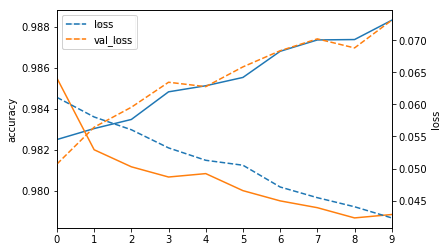

In [61]:
df = pd.DataFrame(history_model.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.show()

DropOut

In [53]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 31s - loss: 0.2977 - acc: 0.9094 - val_loss: 0.1064 - val_acc: 0.9693

In [64]:
score = model_dropout.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.062
Test Accuracy: 0.984


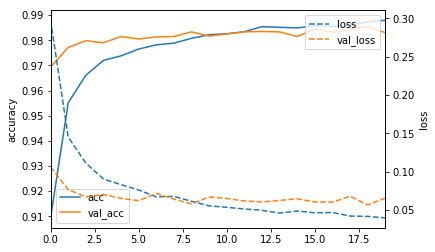

In [54]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.show()

# Task3

In [1]:
import scipy.io as sio 

In [2]:
train_matfn=u'train_32x32.mat'  
train=sio.loadmat(train_matfn) 
X_train = train['X']
y_train = train['y']

In [4]:
test_matfn=u'test_32x32.mat'  
test=sio.loadmat(test_matfn)
X_test = test['X']
y_test = test['y']

In [16]:
batch_size = 128
num_classes = 11
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)
# X_train_images = X_train.reshape(X_train.shape[3], img_rows, img_cols, 3)
# X_test_images = X_test.reshape(X_test.shape[3], img_rows, img_cols, 3)
X_train_images=np.rollaxis(X_train,3,0)
X_test_images=np.rollaxis(X_test,3,0)

from keras.utils.np_utils import to_categorical
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)
from keras.layers import Conv2D, MaxPooling2D, Flatten

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [12]:
y_train_binary.shape

(73257, 11)

In [37]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train_images, y_train_binary,
                      batch_size=200, epochs=30, verbose=1, validation_split=.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/30
42400/58605 [====================>.........] - ETA: 18s - loss: 0.5414 - acc: 0.8393  

KeyboardInterrupt: 

In [20]:
cnn.evaluate(X_test_images, y_test_binary)

26016/26032 [============================>.] - ETA: 0s 

[0.7753648888537249, 0.7812307928703135]

Batch Normalization

In [38]:
from keras.layers import BatchNormalization

num_classes = 11
cnn_small_bn = Sequential()
cnn_small_bn.add(Conv2D(8, kernel_size=(3, 3),
                 input_shape=input_shape))
cnn_small_bn.add(Activation("relu"))
cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Conv2D(8, (3, 3)))
cnn_small_bn.add(Activation("relu"))
cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Flatten())
cnn_small_bn.add(Dense(64, activation='relu'))
cnn_small_bn.add(Dense(num_classes, activation='softmax'))

In [22]:
cnn_small_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_small_bn = cnn_small_bn.fit(X_train_images, y_train_binary,
                                        batch_size=128, epochs=10, verbose=1, validation_split=.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
12544/58605 [=====>........................] - ETA: 45s - loss: 2.2004 - acc: 0.2554 

KeyboardInterrupt: 

# Task4

In [30]:
import os
from keras.preprocessing import image
image_list = pd.read_csv('/Users/haiki/Documents/2017Spring/AML/annotations/list.txt',sep=' ',skiprows = 6,header= None)
image_names = image_list[:][0]
image_names = np.asarray(image_names)

from keras.preprocessing import image

imagesNames = [image.load_img(os.path.join("/Users/haiki/Documents/2017Spring/AML/images", name + '.jpg'), target_size=(224, 224)) for name in image_names]

X = np.array([image.img_to_array(img) for img in imagesNames])

OSError: decoder jpeg not available

In [33]:
features = sio.loadmat('feature.mat')

In [35]:
features = features['feature']

In [36]:
features.shape

(7390, 7, 7, 512)